In [1]:
cd ../images

/orange/adamginsburg/jwst/brick/images


In [4]:
ls

f405-f410.fits
jw02221-o001_t001_miri_f2550w_i2d.fits
jw02221-o001_t001_nircam_clear-f410m_i2d.fits
jw02221-o001_t001_nircam_f405n-f444w_i2d.fits
jw02221-o001_t001_nircam_f444w-f466n_i2d.fits
jw02221-o003_t002_miri_f2550w_i2d.fits


In [5]:
from astropy.io import fits
import reproject

In [6]:
tgt_header = fits.getheader("jw02221-o001_t001_nircam_clear-f410m_i2d.fits", ext=1)

In [7]:
for fn in ('jw02221-o001_t001_nircam_f405n-f444w_i2d.fits',
           'jw02221-o001_t001_nircam_f444w-f466n_i2d.fits'):
    reprj,_ = reproject.reproject_interp(fits.open(fn)[1], tgt_header)
    fits.PrimaryHDU(data=reprj, header=tgt_header).writeto(fn.replace('.fits', '_reprj_f410.fits'))

Set DATE-AVG to '2022-08-28T00:59:05.370' from MJD-AVG.
Set DATE-END to '2022-08-28T01:27:10.957' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.722509 from OBSGEO-[XYZ].
Set OBSGEO-H to 1527124813.495 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T02:01:42.906' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.969' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.690472 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526747727.686 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [9]:
import numpy as np

In [18]:
import pylab as pl
from astropy.visualization import simple_norm

In [43]:
rgb = np.array(
      [
       fits.getdata("jw02221-o001_t001_nircam_f444w-f466n_i2d_reprj_f410.fits"),
       fits.getdata("jw02221-o001_t001_nircam_clear-f410m_i2d.fits", ext=1),
       fits.getdata("jw02221-o001_t001_nircam_f405n-f444w_i2d_reprj_f410.fits"),
      ]
).swapaxes(0,2).swapaxes(0,1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


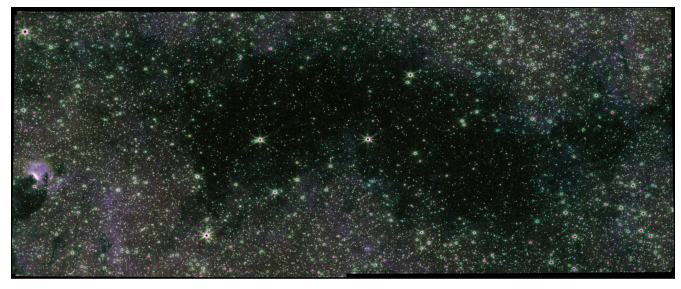

In [44]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=1, max_percent=99.5)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=1, max_percent=99.5)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=1, max_percent=99.5)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(12,5))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


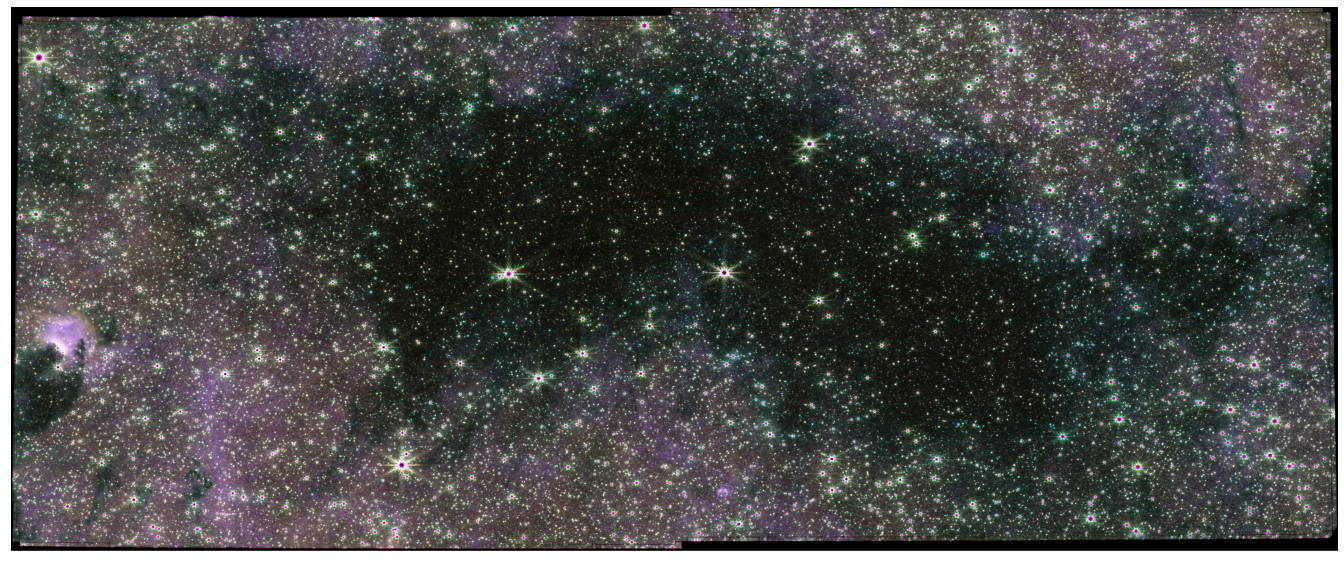

In [54]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

In [55]:
fits.PrimaryHDU(data=rgb_scaled, header=fits.getheader('jw02221-o001_t001_nircam_clear-f410m_i2d.fits', ext=1)).writeto('rgb_466_410_405.fits', overwrite=True)

In [46]:
import matplotlib
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


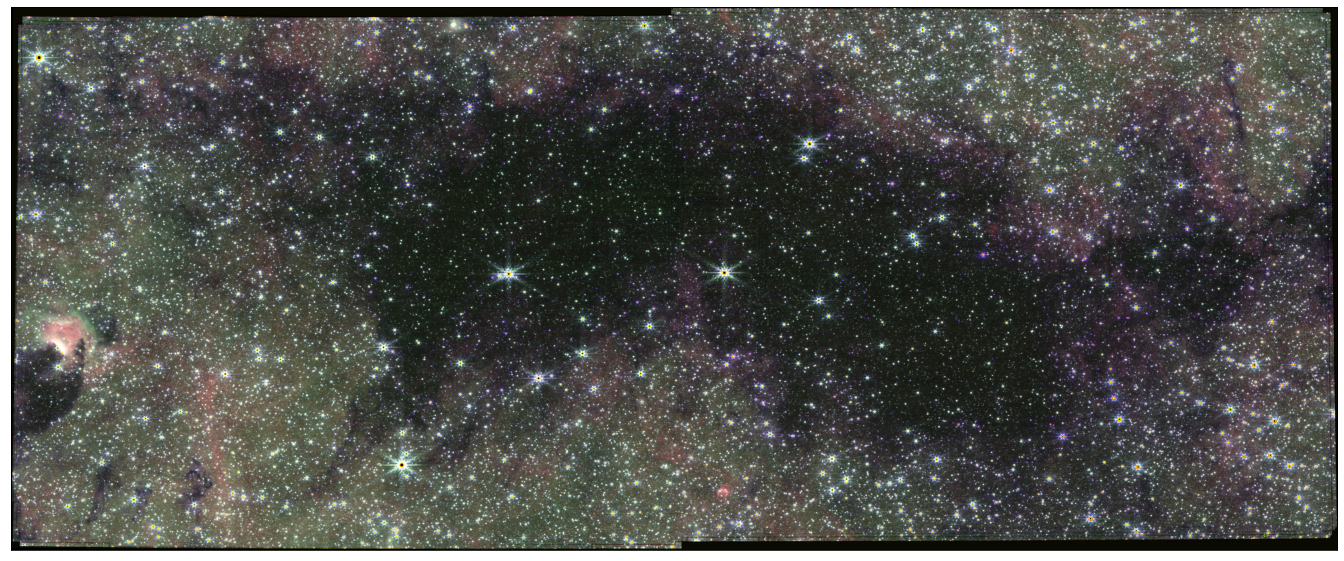

In [49]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += 0.25  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);